In [74]:
import numpy as np
import pandas as pd
import glob
import os
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
path = r'C:\Users\herme\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data'

In [76]:
all_files = glob.glob(os.path.join(path , "*.csv"))
df = pd.concat((pd.read_csv(f) for f in all_files))

In [77]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [78]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [79]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [80]:
df1 = df.dropna()

In [81]:
df1.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [82]:
df1.duplicated().sum()

618

In [83]:
df1 = df1.drop_duplicates()
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [84]:
df1.duplicated().sum()

0

In [85]:
df2 = df1.reset_index()
df2

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
185682,11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
185683,11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
185684,11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
185685,11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [86]:
df2 = df2.drop(['index'],axis = 1)
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185682,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
185683,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
185684,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
185685,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [87]:
df2['Product'].value_counts()

USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                           1
Name: Product, dtype: int64

In [88]:
df2['Quantity Ordered'].value_counts()

1                   168291
2                    13321
3                     2920
4                      806
5                      236
6                       80
7                       24
8                        5
9                        3
Quantity Ordered         1
Name: Quantity Ordered, dtype: int64

In [89]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185687 entries, 0 to 185686
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [90]:
df2.shape

(185687, 6)

In [91]:
pp.ProfileReport(df2)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [92]:
df2['Purchase Address'].value_counts()

193 Forest St, San Francisco, CA 94016      9
223 Elm St, Los Angeles, CA 90001           8
279 Sunset St, San Francisco, CA 94016      8
662 Chestnut St, San Francisco, CA 94016    7
176 North St, San Francisco, CA 94016       7
                                           ..
32 Maple St, Austin, TX 73301               1
460 Pine St, San Francisco, CA 94016        1
957 Ridge St, Atlanta, GA 30301             1
786 North St, San Francisco, CA 94016       1
220 12th St, San Francisco, CA 94016        1
Name: Purchase Address, Length: 140788, dtype: int64

In [93]:
df3 = df2.copy()

In [94]:
#add month columns
df3['Month'] = df3['Order Date'].str[0:2]
df3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [95]:
df3.shape

(185687, 7)

In [96]:
df3['Month'].unique()

array(['04', '05', 'Or', '08', '09', '12', '01', '02', '03', '07', '06',
       '11', '10'], dtype=object)

In [97]:
df3.loc[df3['Month'] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
516,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [98]:
df4 = df3.drop(516,axis = 0).reset_index()
df4

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...,...
185681,185682,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
185682,185683,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
185683,185684,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
185684,185685,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [99]:
df4['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [100]:
df4['Month'] = df4['Month'].astype('int')

In [101]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   index             185686 non-null  int64 
 1   Order ID          185686 non-null  object
 2   Product           185686 non-null  object
 3   Quantity Ordered  185686 non-null  object
 4   Price Each        185686 non-null  object
 5   Order Date        185686 non-null  object
 6   Purchase Address  185686 non-null  object
 7   Month             185686 non-null  int32 
dtypes: int32(1), int64(1), object(6)
memory usage: 10.6+ MB


In [102]:
df4.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [103]:
df4['Price Each'] = df4['Price Each'].astype('float')
df4['Quantity Ordered'] = df4['Quantity Ordered'].astype('int')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             185686 non-null  int64  
 1   Order ID          185686 non-null  object 
 2   Product           185686 non-null  object 
 3   Quantity Ordered  185686 non-null  int32  
 4   Price Each        185686 non-null  float64
 5   Order Date        185686 non-null  object 
 6   Purchase Address  185686 non-null  object 
 7   Month             185686 non-null  int32  
dtypes: float64(1), int32(2), int64(1), object(4)
memory usage: 9.9+ MB


In [104]:
df4['Total'] = df4['Quantity Ordered']*df4['Price Each']
df4

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...,...
185681,185682,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
185682,185683,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
185683,185684,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
185684,185685,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


<AxesSubplot:xlabel='Month'>

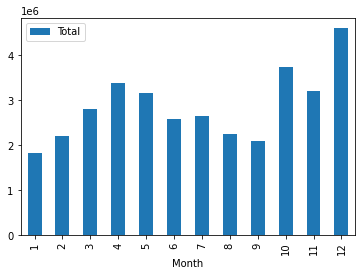

In [105]:
df5 = df4.groupby('Month').sum().drop(['Price Each','index','Quantity Ordered'],axis = 1)
df5.plot.bar()

In [106]:
df5

,Total
Month,
1,1821413.16
2,2200078.08
3,2804973.35
4,3389217.98
5,3150616.23
6,2576280.15
7,2646461.32
8,2241083.37
9,2094465.69


In [107]:
#Tháng 12 bán dc nhiều nhất : 4.6m

In [108]:
df6 = df4.groupby('Product').sum().drop(['Price Each','index','Quantity Ordered','Month'],axis = 1)
df6

,Total
Product,
20in Monitor,453818.74
27in 4K Gaming Monitor,2433147.61
27in FHD Monitor,1131074.59
34in Ultrawide Monitor,2352898.08
AA Batteries (4-pack),106041.60
AAA Batteries (4-pack),92648.14
Apple Airpods Headphones,2345550.00
Bose SoundSport Headphones,1342865.70
Flatscreen TV,1443900.00


<AxesSubplot:xlabel='Product'>

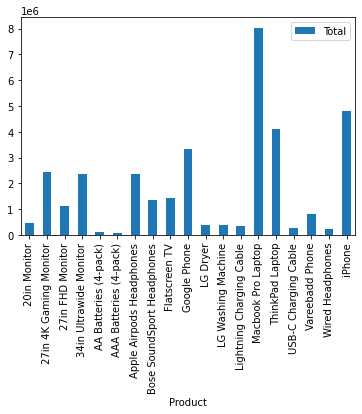

In [109]:
df6.plot.bar()

In [110]:
#Macbook mang lại lợi nhuận nhiều nhất

In [111]:
df7 = df4.groupby('Product').sum().drop(['Price Each','index','Total','Month'],axis = 1)
df7

,Quantity Ordered
Product,
20in Monitor,4126
27in 4K Gaming Monitor,6239
27in FHD Monitor,7541
34in Ultrawide Monitor,6192
AA Batteries (4-pack),27615
AAA Batteries (4-pack),30986
Apple Airpods Headphones,15637
Bose SoundSport Headphones,13430
Flatscreen TV,4813


<AxesSubplot:xlabel='Product'>

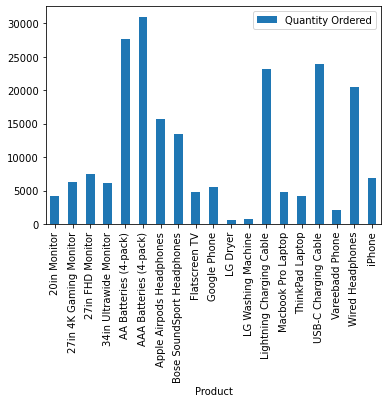

In [112]:
df7.plot.bar()

In [113]:
#pin và cáp dc bán chạy nhất

In [114]:
df4['Purchase Address'] = df4['Purchase Address'].astype('str')
df8 = df4.copy()
df8['City'] = df4['Purchase Address'].apply(lambda x :x.split(',')[1])
df8.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [115]:
df8 = df8.drop(['index','Purchase Address','Order Date','Price Each','Quantity Ordered'],axis = 1)
df8

,Order ID,Product,Month,Total,City
0,176558,USB-C Charging Cable,4,23.90,Dallas
1,176559,Bose SoundSport Headphones,4,99.99,Boston
2,176560,Google Phone,4,600.00,Los Angeles
3,176560,Wired Headphones,4,11.99,Los Angeles
4,176561,Wired Headphones,4,11.99,Los Angeles
...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),9,8.97,Los Angeles
185682,259354,iPhone,9,700.00,San Francisco
185683,259355,iPhone,9,700.00,San Francisco
185684,259356,34in Ultrawide Monitor,9,379.99,San Francisco


In [116]:
df_city  = df8.groupby('City').sum().drop(['Month'],axis = 1)
df_city

,Total
City,
Atlanta,2794199.07
Austin,1818044.33
Boston,3658627.65
Dallas,2765373.96
Los Angeles,5448304.28
New York City,4661867.14
Portland,2319331.94
San Francisco,8254743.55
Seattle,2745046.02


<AxesSubplot:xlabel='City'>

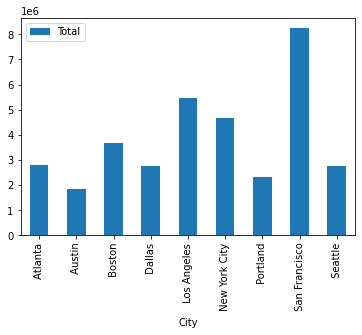

In [117]:
df_city.plot.bar()

In [118]:
#sanfran ban chay nhat , tai sao ?  

In [119]:
#thời gian nào nên đẩy mạnh việc chạy qc

In [120]:
df4

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...,...
185681,185682,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
185682,185683,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
185683,185684,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
185684,185685,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [121]:
df4['Order Date'] = pd.to_datetime(df4['Order Date'])
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   index             185686 non-null  int64         
 1   Order ID          185686 non-null  object        
 2   Product           185686 non-null  object        
 3   Quantity Ordered  185686 non-null  int32         
 4   Price Each        185686 non-null  float64       
 5   Order Date        185686 non-null  datetime64[ns]
 6   Purchase Address  185686 non-null  object        
 7   Month             185686 non-null  int32         
 8   Total             185686 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(3)
memory usage: 11.3+ MB


In [122]:
df4.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [123]:
df4 = df4.drop(['index'],axis = 1)
df_time = df4.copy()

In [124]:
df_time['Hour'] = df_time['Order Date'].dt.hour
#df_time['Minute'] = df_time['Order Date'].dt.minute
df_time.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9


<AxesSubplot:>

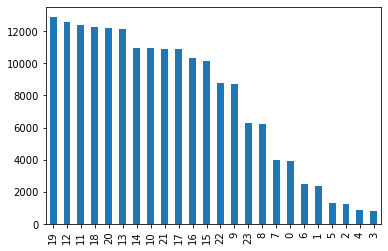

In [125]:
df_time['Hour'].value_counts().plot.bar()

In [126]:
sub_time = pd.DataFrame(df_time['Hour'].value_counts())
sub_time = sub_time.reset_index()
sub_time = sub_time.sort_values('index')
sub_time

,index,Hour
17,0,3902
19,1,2347
21,2,1242
23,3,830
22,4,852
20,5,1320
18,6,2481
16,7,4002
15,8,6252
13,9,8740


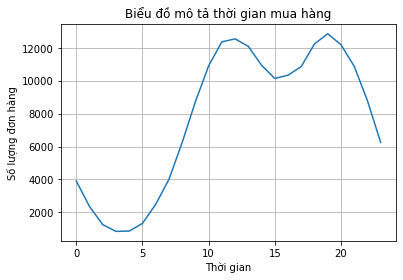

In [127]:
plt.plot(sub_time['index'],sub_time['Hour'])
plt.title('Biểu đồ mô tả thời gian mua hàng')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng đơn hàng')
plt.grid()
plt.show()

In [128]:
#Thường mua hàng ở 11-12 và 19h -> có thể làm gì với thông tin này ?

In [129]:
df4

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97
185682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
185683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00
185684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99


In [130]:
df_order = df4[['Order ID','Product']]
df_order['Product in Order'] = df_order.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df_order.head()

C:\Users\herme\AppData\Local\Temp/ipykernel_23968/2762286360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order['Product in Order'] = df_order.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,Product,Product in Order
0,176558,USB-C Charging Cable,USB-C Charging Cable
1,176559,Bose SoundSport Headphones,Bose SoundSport Headphones
2,176560,Google Phone,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,"Google Phone,Wired Headphones"
4,176561,Wired Headphones,Wired Headphones


In [131]:
df_order = df_order.drop(['Product'], axis = 1)
df_order = df_order.drop_duplicates()
df_order 

,Order ID,Product in Order
0,176558,USB-C Charging Cable
1,176559,Bose SoundSport Headphones
2,176560,"Google Phone,Wired Headphones"
4,176561,Wired Headphones
5,176562,USB-C Charging Cable
...,...,...
185681,259353,AAA Batteries (4-pack)
185682,259354,iPhone
185683,259355,iPhone
185684,259356,34in Ultrawide Monitor


In [132]:
df_order = df_order.reset_index().drop(['index'],axis = 1)
df_order

,Order ID,Product in Order
0,176558,USB-C Charging Cable
1,176559,Bose SoundSport Headphones
2,176560,"Google Phone,Wired Headphones"
3,176561,Wired Headphones
4,176562,USB-C Charging Cable
...,...,...
178432,259353,AAA Batteries (4-pack)
178433,259354,iPhone
178434,259355,iPhone
178435,259356,34in Ultrawide Monitor


In [133]:
from itertools import combinations
from collections import Counter

In [134]:
count = Counter()

for row in df_order['Product in Order'] :
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

In [135]:
#10 cặp sp hay được bán cùng nhau                 
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1002),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 413),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 159),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [136]:
for key,value in count.most_common(10) :
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Dựa vào đây có thể đưa ra các gói combo, chương trình khuyến mãi để tăng doanh thu, thu hút k/h

<AxesSubplot:xlabel='Month'>

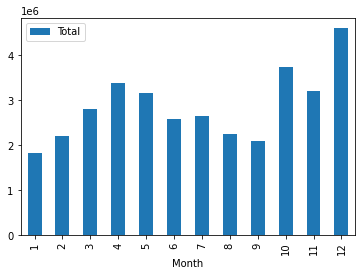

In [154]:
df5.plot.bar()

Nhận xét :
- Bán được nhiều nhất vào 3 tháng cuối năm, đầu năm doanh thu thấp, tăng dần đến tháng tư và giảm đến tháng 9, tăng đột biến vào tháng 10. Tháng 12 có doanh thu cao nhất 4,6m$ -> Cần nghiên cứu về thói quen mua sắm
- Phỏng đoán : Dịp cuối năm thường ra mắt các sản phẩm công nghệ mới (iphone mới sẽ được ra mắt vào tháng 9 và có mặt tại các cửa hàng vào tháng 11-12(tương tự với pre-order) , các đợt giảm giá, vừa kết thúc các kì nghỉ. Có thể điều tra các dịp đặc biệt khác trong tháng 4, tháng 9 và tháng 10, lịch vacation của quốc gia. Từ đó đưa ra chiến lược sale + marketing để tăng doanh thu
Giải pháp : Thảo luận lại với team sale, team marketing để ra chiến lược hợp lý. Vì cần thêm domain knowleged + tư vấn từ bộ phận có chuyên môn

<AxesSubplot:xlabel='Product'>

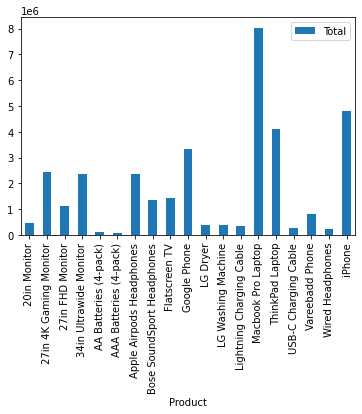

In [138]:
df6.plot.bar()

Sản phẩm mang lại doanh thu cao nhất là macbook, sau đó đến iphone và laptop thinkpad

<AxesSubplot:xlabel='Product'>

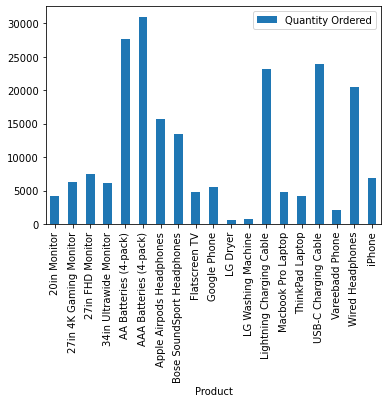

In [139]:
df7.plot.bar()

Pin được bán với số lượng nhiều nhất, cáp sạc thứ nhì.
Tại sao ?
Thói quen mua sắm, mức giá, độ bền, nhu cầu

<AxesSubplot:xlabel='City'>

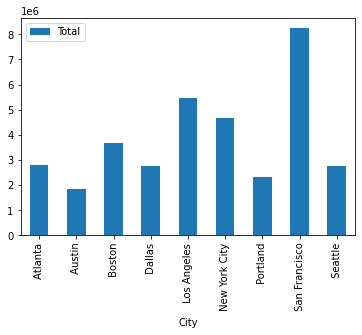

In [140]:
df_city.plot.bar()

San Francisco mang lại doanh thu cao nhất. Tại sao ?
Vì mức sống cao ? Có Silicon valley ? ...
Có thể kiểm tra các sản phẩm bán chạy ở đây, 

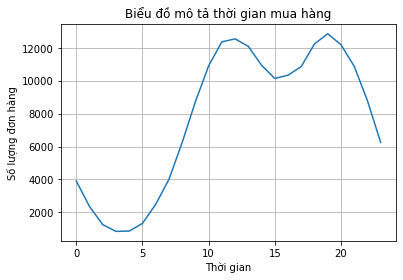

In [141]:
plt.plot(sub_time['index'],sub_time['Hour'])
plt.title('Biểu đồ mô tả thời gian mua hàng')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng đơn hàng')
plt.grid()
plt.show()

Khách hàng mua hàng nhiều nhất vào cung giờ 11-12h => chạy các quảng cáo, chương trình giảm giá tại cửa tiệm vào thời gian này để thu hút khách hàng

In [142]:
df4['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [178]:
df_iphone = df4.loc[df4['Product'] == 'iPhone']
df_iphone

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total
25,176581,iPhone,1,700.0,2019-04-09 21:38:00,"84 Jackson St, Boston, MA 02215",4,700.0
53,176608,iPhone,1,700.0,2019-04-11 12:01:00,"15 Cherry St, San Francisco, CA 94016",4,700.0
96,176651,iPhone,1,700.0,2019-04-07 13:14:00,"997 South St, Boston, MA 02215",4,700.0
144,176696,iPhone,1,700.0,2019-04-07 12:41:00,"343 Johnson St, New York City, NY 10001",4,700.0
180,176732,iPhone,1,700.0,2019-04-23 09:33:00,"504 Wilson St, Dallas, TX 75001",4,700.0
...,...,...,...,...,...,...,...,...
185602,259278,iPhone,1,700.0,2019-09-11 07:24:00,"505 Hickory St, Atlanta, GA 30301",9,700.0
185615,259291,iPhone,1,700.0,2019-09-07 18:43:00,"841 Park St, Portland, OR 97035",9,700.0
185621,259297,iPhone,1,700.0,2019-09-15 18:54:00,"138 Main St, Boston, MA 02215",9,700.0
185682,259354,iPhone,1,700.0,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.0


In [180]:
df_iphone = df_iphone[['Month']]
df_iphone2 = pd.DataFrame(df_iphone.value_counts()).reset_index().sort_values(by = 'Month')
df_iphone2.columns.values[1] = "Amount"
df_iphone2

,Month,Amount
11,1,381
9,2,438
5,3,537
2,4,691
4,5,640
6,6,532
7,7,501
8,8,439
10,9,396
1,10,715


<AxesSubplot:xlabel='Month'>

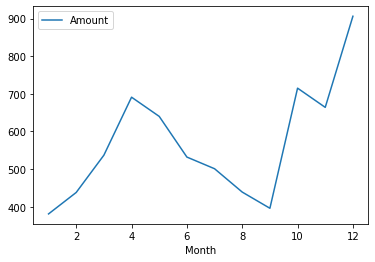

In [173]:
df_iphone2.plot.line(x = 'Month' , y = 'Amount')

In [182]:
df4['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [181]:
def draw_line_chart(df,product_name):
    product_name = str(product_name)
    df_sub = df4.loc[df4['Product'] == product_name]
    df_sub = df_sub[['Month']]
    df_sub2 = pd.DataFrame(df_sub.value_counts()).reset_index().sort_values(by = 'Month')
    df_sub2.columns.values[1] = "Amount"
    df_sub2.plot.line(x = 'Month' , y = 'Amount')

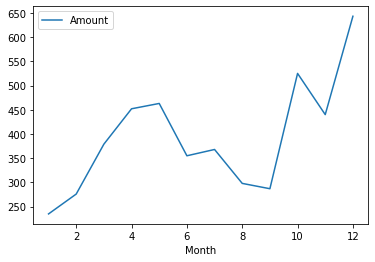

In [187]:
draw_line_chart(df4,'Macbook Pro Laptop')

<AxesSubplot:xlabel='Month'>

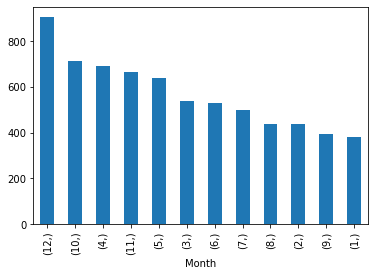

In [146]:
df_iphone.value_counts().plot.bar()

In [147]:
df_product = df4[['Product','Month']]
df_product

,Product,Month
0,USB-C Charging Cable,4
1,Bose SoundSport Headphones,4
2,Google Phone,4
3,Wired Headphones,4
4,Wired Headphones,4
...,...,...
185681,AAA Batteries (4-pack),9
185682,iPhone,9
185683,iPhone,9
185684,34in Ultrawide Monitor,9


In [148]:
df_sub = pd.DataFrame(df_product.value_counts())

In [149]:
df_sub = df_sub.sort_values(by = 'Month')

In [150]:
df_sub.columns = ['Amount']

In [151]:
df_sub

,,Amount
Product,Month,
Bose SoundSport Headphones,1,659
Macbook Pro Laptop,1,235
Flatscreen TV,1,244
20in Monitor,1,215
27in FHD Monitor,1,421
...,...,...
Macbook Pro Laptop,12,643
20in Monitor,12,567
Vareebadd Phone,12,284


In [152]:
df_sub = df_sub.reset_index()
df_sub2 = df_sub[['Product','Month','Amount']]
df_sub2

,Product,Month,Amount
0,Bose SoundSport Headphones,1,659
1,Macbook Pro Laptop,1,235
2,Flatscreen TV,1,244
3,20in Monitor,1,215
4,27in FHD Monitor,1,421
...,...,...,...
223,Macbook Pro Laptop,12,643
224,20in Monitor,12,567
225,Vareebadd Phone,12,284
226,LG Washing Machine,12,80


Product
20in Monitor                  AxesSubplot(0.125,0.125;0.775x0.755)
27in 4K Gaming Monitor        AxesSubplot(0.125,0.125;0.775x0.755)
27in FHD Monitor              AxesSubplot(0.125,0.125;0.775x0.755)
34in Ultrawide Monitor        AxesSubplot(0.125,0.125;0.775x0.755)
AA Batteries (4-pack)         AxesSubplot(0.125,0.125;0.775x0.755)
AAA Batteries (4-pack)        AxesSubplot(0.125,0.125;0.775x0.755)
Apple Airpods Headphones      AxesSubplot(0.125,0.125;0.775x0.755)
Bose SoundSport Headphones    AxesSubplot(0.125,0.125;0.775x0.755)
Flatscreen TV                 AxesSubplot(0.125,0.125;0.775x0.755)
Google Phone                  AxesSubplot(0.125,0.125;0.775x0.755)
LG Dryer                      AxesSubplot(0.125,0.125;0.775x0.755)
LG Washing Machine            AxesSubplot(0.125,0.125;0.775x0.755)
Lightning Charging Cable      AxesSubplot(0.125,0.125;0.775x0.755)
Macbook Pro Laptop            AxesSubplot(0.125,0.125;0.775x0.755)
ThinkPad Laptop               AxesSubplot(0.125,0.125;

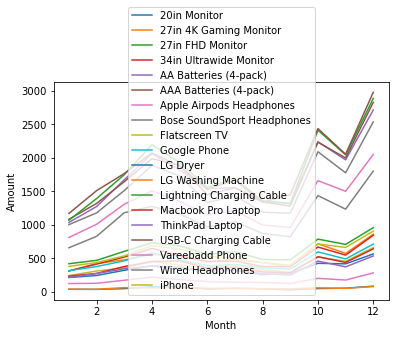

In [153]:
df_sub2.set_index("Month", inplace=True)
df_sub2.groupby("Product")["Amount"].plot(legend=True, xlabel="Month", ylabel="Amount")